---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
np.random.binomial(1, 0.5)

1

In [4]:
np.random.binomial(1000, 0.5)/1000

0.501

In [5]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

6

In [6]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

109 tornadoes back to back in 2739.72602739726 years


In [7]:
np.random.uniform(0, 1,20)

array([ 0.41729827,  0.7437594 ,  0.8954259 ,  0.25139012,  0.19426207,
        0.38350807,  0.214316  ,  0.64306144,  0.2617249 ,  0.01038435,
        0.58027117,  0.83778366,  0.19551486,  0.50927502,  0.78821291,
        0.00118963,  0.75147175,  0.02557336,  0.09526335,  0.30984609])

In [8]:
np.random.normal(0.75,0.3)

0.6303220060966198

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [9]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0168143769429876

In [10]:
np.std(distribution)

1.0168143769429876

In [11]:
import scipy.stats as stats
stats.kurtosis(distribution)

0.3000467499567976

In [12]:
stats.skew(distribution)

0.03588587315490754

In [13]:
chi_squared_df2 = np.random.chisquare(2, size=100000)
print(chi_squared_df2)
stats.skew(chi_squared_df2)

[ 0.64549632  3.48648047  0.66726855 ...,  0.10598359  0.65732851
  5.68528747]


1.9958579170966364

In [14]:
chi_squared_df5 = np.random.chisquare(5, size=100000)
print(chi_squared_df5)
stats.skew(chi_squared_df5)

[ 9.14945926  2.10810838  2.53005171 ...,  0.46164724  2.13136691
  4.64509487]


1.276747659146829

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


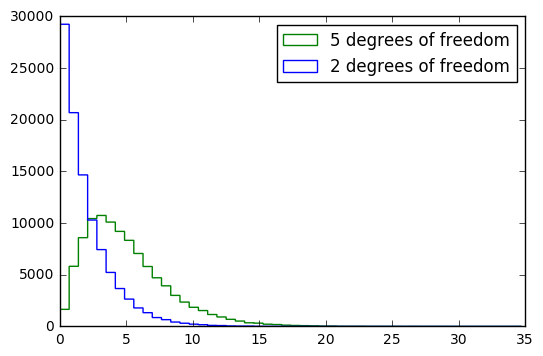

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [16]:
df = pd.read_csv('grades.csv')

In [17]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [18]:
len(df)

2315

In [25]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [26]:
early.mean()
early

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000
5,D09000A0-827B-C0FF-3433-BF8FF286E15B,71.647278,2015-12-28 04:35:32.836000000,64.052550,2016-01-03 21:05:38.392000000,64.752550,2016-01-07 08:55:43.692000000,57.467295,2016-01-11 00:45:28.706000000,57.467295,2016-01-11 00:54:13.579000000,57.467295,2016-01-20 19:54:46.166000000
8,C9D51293-BD58-F113-4167-A7C0BAFCB6E5,66.595568,2015-12-25 02:29:28.415000000,52.916454,2015-12-31 01:42:30.046000000,48.344809,2016-01-05 23:34:02.180000000,47.444809,2016-01-02 07:48:42.517000000,37.955847,2016-01-03 21:27:04.266000000,37.955847,2016-01-19 15:24:31.060000000
11,B017B4A6-1F41-9D46-A040-21B0D270D4BE,76.670469,2015-10-05 02:11:05.947000000,68.573422,2015-10-11 23:08:01.288000000,69.273422,2015-10-14 06:03:04.482000000,54.698738,2015-10-19 00:34:45.875000000,49.228864,2015-10-24 11:25:20.846000000,49.228864,2015-10-26 15:56:55.374000000
15,24827B50-2FC2-E4B0-E2A0-1989E17749B3,14.959603,2015-11-17 01:16:07.800000000,14.459603,2015-11-22 15:00:14.342000000,12.307682,2015-11-28 13:12:23.939000000,9.126146,2015-11-29 17:06:51.153000000,8.213531,2015-12-06 21:21:09.208000000,7.392178,2015-12-10 01:16:09.387000000
17,D6EFCCCA-82CA-C4BE-1C3E-D0477DE28B24,53.555227,2015-09-17 13:06:39.955000000,53.055227,2015-09-20 09:57:00.973000000,48.469704,2015-09-21 13:17:53.140000000,47.569704,2015-09-22 10:12:42.156000000,42.812734,2015-09-27 10:58:56.037000000,42.812734,2015-09-30 18:24:47.681000000
19,C040D322-E970-4E8F-22A6-2FFAF2D74061,36.383575,2015-11-12 14:05:47.682000000,32.315217,2015-11-29 12:17:05.380000000,33.015217,2015-12-24 08:32:51.206000000,25.692174,2015-12-15 12:46:09.484000000,20.553739,2015-12-27 06:11:42.755000000,16.442991,2016-01-04 07:07:44.849000000
22,A1331E62-50B5-94FC-E0CE-3092CB3D30D9,88.901114,2015-09-16 22:33:02.686000000,70.760891,2015-09-23 23:30:17.970000000,64.404802,2015-09-30 03:54:05.524000000,50.803842,2015-10-02 00:38:00.096000000,50.803842,2015-10-08 18:57:57.501000000,45.723457,2015-10-10 20:42:09.120000000


In [21]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [22]:
from scipy import stats
stats.ttest_ind?

In [29]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])
early['assignment1_grade']

0        92.733946
1        86.790821
4        64.813800
5        71.647278
8        66.595568
11       76.670469
15       14.959603
17       53.555227
19       36.383575
22       88.901114
24       88.700055
25       73.256087
27       75.756429
28       94.437504
31       67.272728
35       84.569747
37       46.216968
41       92.313072
42       54.648509
44       84.397806
45       74.831750
46       74.358688
48       68.723308
50       75.412068
52       64.138166
53       39.502537
54       59.925967
55       57.644747
58       95.568756
59       89.708593
           ...    
2249     62.510334
2251     51.425058
2252     62.255515
2254     87.734423
2255     62.375855
2257     95.119516
2261     72.020605
2263     88.329148
2264     86.824217
2267     86.507833
2268     78.438381
2269     62.842774
2270     75.009522
2277     84.572437
2280     61.897192
2281     47.544490
2285     99.467096
2288    100.009744
2289     84.266188
2291     92.912163
2294     75.499444
2296     74.

In [24]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [75]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)